In [1]:
from uproot_io import Events, View
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt

filename = 'projects/CheatedRecoFile_1.root'
events = Events(filename)

from variables import *
from ROC import *
from PLOT import *

In [12]:
particle_id_dict = {-2212:"ANTIPROTON", -321:"KAON -", -211:"PION -", -13:"MUON -", -11:"ELECTRON", 0:"NO BEST MATCH", 11:"POSTIRON", 13:"MUON +", 22:"GAMMA", 211:"PION +", 321:"KAON +", 2212:"PROTON", 3112:"SIGMA -", 3222:"SIGMA +"}

def pdg_idx(pdg_code,min_hits,purity):
    temp = np.where(events.mc_pdg == pdg_code)[0]
    idx = [i for i in temp if (events.reco_num_hits_w[i] >= min_hits) and (events.reco_num_hits_u[i] >= min_hits) and (events.reco_num_hits_v[i] >= min_hits) and (events.purity[i] >= purity)]
    return idx

minhits = 7

protons_idx = pdg_idx(2212,minhits,1)
pion_plus = pdg_idx(211,minhits,1)
pion_minus = pdg_idx(-211,minhits,1)
muon_plus = pdg_idx(13,minhits,1)
muon_minus = pdg_idx(-13,minhits,1) 

tracks_idx = np.concatenate((protons_idx,pion_plus,pion_minus,muon_plus,muon_minus))

electron_idx = pdg_idx(-11,minhits,1)
positron_idx = pdg_idx(11,minhits,1)
gamma_idx = pdg_idx(22,minhits,1)

showers_idx = np.concatenate((gamma_idx,positron_idx,electron_idx))




In [13]:
n_particles = 4000

tracks_rms_w = [particle_rms(events,i,"w") for i in tracks_idx]
showers_rms_w = [particle_rms(events,i,"w") for i in showers_idx]



c:\Users\red20\Documents\Physics_Project\variables.py:60: RankWarning: Polyfit may be poorly conditioned
  residuals = particle_data(event_obj,num_particle,direction)[0]
c:\Users\red20\Documents\Physics_Project\variables.py:60: RankWarning: Polyfit may be poorly conditioned
  residuals = particle_data(event_obj,num_particle,direction)[0]
c:\Users\red20\Documents\Physics_Project\variables.py:60: RankWarning: Polyfit may be poorly conditioned
  residuals = particle_data(event_obj,num_particle,direction)[0]


TypeError: expected non-empty vector for x

In [5]:
def L_trackvar(tr,sh,bins,z_score):
    max_tr = np.mean(tr)+(z_score)*np.std(tr)
    max_sh = np.mean(sh)+(z_score)*np.std(sh)
    
    min_sh = min(sh)
    min_tr = min(tr)
    L_tr = np.array([])
    
    bins_array =np.concatenate(([min_tr],[min_sh + i*((max_tr-min_sh)/bins) for i in range(bins)],[max_tr,max_sh]))
    tr_pdf = np.histogram(tr,bins=bins_array,density=True)[0]
    sh_pdf = np.histogram(sh,bins=bins_array,density=True)[0]

    for i in range(np.size(bins_array)-1):
        if (tr_pdf[i] == 0):
            L_tr = np.append(L_tr,0)
        elif (sh_pdf[i] == 0):
            L_tr = np.append(L_tr,1)
        else:
            L_tr = np.append(L_tr,tr_pdf[i]/(sh_pdf[i]+tr_pdf[i]))
    
    
    return L_tr,bins_array,tr_pdf,sh_pdf





In [13]:
bins = 200
z_score = 5
L_tr = L_trackvar(tracks_rms_w,showers_rms_w,bins,z_score)[0]
b = L_trackvar(tracks_rms_w,showers_rms_w,bins,z_score)[1]

t = L_trackvar(tracks_rms_w,showers_rms_w,bins,z_score)[2]
s = L_trackvar(tracks_rms_w,showers_rms_w,bins,z_score)[3]

print(np.where(tracks_rms_w == max(tracks_rms_w)))
print(tracks_idx[20323])

(array([20323], dtype=int64),)
178118


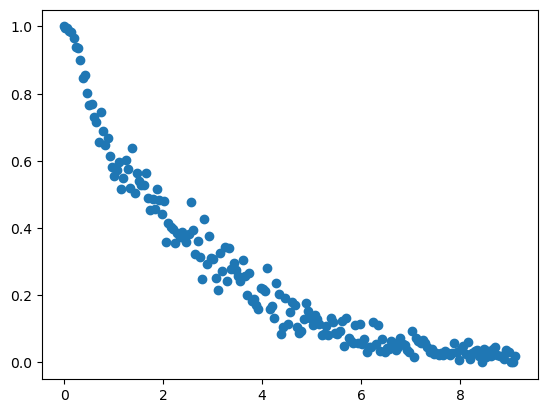

In [14]:
plt.plot()